### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('global_epistasis_RNA_splicing/psi_9nt.csv')
# remove nan's
input_data_ordered_raw = input_data_ordered_raw.dropna()

In [2]:
input_data_ordered_raw.head()

,seq,brca2_9nt,brca2_9nt_stderr,ikbkap_9nt,ikbkap_9nt_stderr,smn1_9nt,smn1_9nt_stderr
0,AAAGCAAAA,0.373522,0.095217,0.080039,0.081333,0.227001,0.082164
1,AAAGCAAAC,0.688386,0.063575,0.061021,0.018316,0.522138,0.017503
2,AAAGCAAAG,0.756357,0.481555,0.045032,0.023374,0.210907,0.170688
3,AAAGCAAAU,0.443014,0.127961,0.071423,0.028762,0.232645,0.044371
4,AAAGCAACA,0.548363,0.140963,0.100128,0.071551,0.362139,0.127696


## Read replicates File

In [3]:
replicates_df = pd.read_csv('global_epistasis_RNA_splicing/Smn1Nreps.csv',names=['seq_rna','replicates'])
replicates_df.head()

,seq_rna,replicates
0,AAAGCAAAA,7
1,AAAGCAAAC,7
2,AAAGCAAAG,7
3,AAAGCAAAU,7
4,AAAGCAACA,7


In [4]:
len(replicates_df)

30732

In [5]:
# sequences with 7 replicates
seqs_with_less_than_7_replicates = replicates_df.loc[replicates_df['replicates']<7]

In [9]:
len(seqs_with_less_than_7_replicates)

13020

In [6]:
#len_of_data_to_use = 10000
#sequences = input_data_ordered_raw['seq'][0:len_of_data_to_use]
#val = input_data_ordered_raw['val'][0:len_of_data_to_use]

sequences = input_data_ordered_raw['seq']
val = input_data_ordered_raw['smn1_9nt']

In [7]:
len(sequences)

24831

In [8]:
len(replicates_df)

30732

In [10]:
rna_splice_df = pd.DataFrame({'seq_rna':sequences,'val':val})
#gb1_df_10k.to_csv('gb1_10k.csv',sep='\t')

In [21]:
rna_splice_df.head()

,seq_rna,val
0,AAAGCAAAA,0.227001
1,AAAGCAAAC,0.522138
2,AAAGCAAAG,0.210907
3,AAAGCAAAU,0.232645
4,AAAGCAACA,0.362139


In [11]:
rna_splice_df = pd.merge(rna_splice_df,seqs_with_less_than_7_replicates,how='inner',on='seq_rna')

In [12]:
rna_splice_df.head()

,seq_rna,val,replicates
0,AAAGCACAC,0.729031,6
1,AAAGCACAG,0.587774,6
2,AAAGCACCC,0.000000,6
3,AAAGCACGA,3.996918,6
4,AAAGCACUC,0.519077,6


In [14]:
#rna_splice_df.to_csv('rna_splice_df.csv',sep='\t')
rna_splice_df.to_csv('global_epistasis_RNA_splicing/rna_splice_df_less_than_7_replicates.csv',sep='\t')

## Get percentiles column from values

In [15]:
from scipy.stats import percentileofscore

# generate example data
arr = rna_splice_df['val']

# pre-sort array
arr_sorted =  sorted(arr)

# calculate percentiles using scipy func percentileofscore on each array element
s = pd.Series(arr)
percentiles = s.apply(lambda x: percentileofscore(arr_sorted, x))

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


In [16]:
val_scaled = percentiles
val_scaled = (val_scaled-min(val_scaled))/(max(val_scaled)-min(val_scaled))
rna_splice_df['val_scaled'] = val_scaled

In [17]:
bins_to_use = 20
#counts,bins = np.histogram(gb1_df_10k['val'],bins=bins_to_use)
counts,bins = np.histogram(val_scaled,bins=bins_to_use)

In [18]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [19]:
temp_df = rna_splice_df.copy()

In [20]:
temp_df.head()

,seq_rna,val,replicates,val_scaled
0,AAAGCACAC,0.729031,6,0.344729
1,AAAGCACAG,0.587774,6,0.312679
2,AAAGCACCC,0.000000,6,0.000000
3,AAAGCACGA,3.996918,6,0.587901
4,AAAGCACUC,0.519077,6,0.294785


In [21]:
for bin_index in range(len(bins)):
    if(bin_index<len(bins)-1):
        print(bin_index,bins[bin_index],bins[bin_index+1]) 

0 0.0 0.05
1 0.05 0.1
2 0.1 0.15000000000000002
3 0.15000000000000002 0.2
4 0.2 0.25
5 0.25 0.30000000000000004
6 0.30000000000000004 0.35000000000000003
7 0.35000000000000003 0.4
8 0.4 0.45
9 0.45 0.5
10 0.5 0.55
11 0.55 0.6000000000000001
12 0.6000000000000001 0.65
13 0.65 0.7000000000000001
14 0.7000000000000001 0.75
15 0.75 0.8
16 0.8 0.8500000000000001
17 0.8500000000000001 0.9
18 0.9 0.9500000000000001
19 0.9500000000000001 1.0


## Get sequences and bin numbers

In [22]:
sequence_bins_list = []
# loop over every sequence
for index, row in temp_df.iterrows():
    # for each row, put sequences in the correct bin based on comparing values to bins
    #print(index,row['seq'], row['val'])
    for bin_index in range(len(bins)):
        if(bin_index<len(bins)-1): # do go out of bounds
            if((row['val_scaled']>= bins[bin_index]) and (row['val_scaled']<=bins[bin_index+1])):
                #print('Seq: ',row['seq'],' going in bin: ',bin_index)
                sequence_bins_list.append([row['seq_rna'],bin_index])


In [23]:
sequence_counts_array = np.array(sequence_bins_list)

In [24]:
len(sequence_counts_array)

8533

In [25]:
sequence_counts_array[:,1]
seq_bin_df = pd.DataFrame({'seq_rna':sequence_counts_array[:,0],'bin':sequence_counts_array[:,1]})
seq_bin_df.head()

,bin,seq_rna
0,6,AAAGCACAC
1,6,AAAGCACAG
2,0,AAAGCACCC
3,11,AAAGCACGA
4,5,AAAGCACUC


In [26]:
print(min(sequence_counts_array[:,1].astype('int')))
print(max(sequence_counts_array[:,1].astype('int')))

0
19


In [27]:
count_cols = []
for bin_index in range(len(bins)-1):
    count_cols.append('ct_'+str(bin_index))

In [28]:
count_cols

['ct_0',
 'ct_1',
 'ct_2',
 'ct_3',
 'ct_4',
 'ct_5',
 'ct_6',
 'ct_7',
 'ct_8',
 'ct_9',
 'ct_10',
 'ct_11',
 'ct_12',
 'ct_13',
 'ct_14',
 'ct_15',
 'ct_16',
 'ct_17',
 'ct_18',
 'ct_19']

In [29]:
# append count columns to the dataframe
#c ount_cols are ['ct_0','ct_1','ct_2','ct_3','ct_4','ct_5','ct_6','ct_7','ct_8','ct_9'] for bins = 10
d = dict.fromkeys(count_cols, 0)
seq_counts_df = seq_bin_df.assign(**d).copy()

In [30]:
seq_counts_df.head(10)

,bin,seq_rna,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,6,AAAGCACAC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,AAAGCACAG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,AAAGCACCC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,AAAGCACGA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,AAAGCACUC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,AAAGCAGAC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,AAAGCAGCC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12,AAAGCAGCG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6,AAAGCAGGC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,AAAGCAGUG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## populate counts columns

In [31]:
number_cols_to_displace = 2

for row_index in range(len(seq_counts_df['bin'])):
    count_col = seq_counts_df.columns[int(seq_counts_df['bin'][row_index])+number_cols_to_displace]
    seq_counts_df.loc[row_index,count_col] = 1

    

In [32]:
seq_counts_df.head(10)

,bin,seq_rna,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,6,AAAGCACAC,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,AAAGCACAG,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,AAAGCACCC,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,AAAGCACGA,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,AAAGCACUC,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,AAAGCAGAC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,AAAGCAGCC,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12,AAAGCAGCG,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,6,AAAGCAGGC,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,4,AAAGCAGUG,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
len(temp_df['val_scaled'])

16298

## Write dataframe to file to be evaluated by mpathic

In [33]:
seq_counts_df.to_csv('global_epistasis_RNA_splicing/rna_mpathic_less_than_7_replicates_format_20_ct.csv',sep='\t')

In [57]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression'

In [41]:
# rna_splice_df_7_replicates
eval_model_df = pd.read_csv('global_epistasis_RNA_splicing/evaluated_rna_model_less_than_7_replicates_val_20_ct.csv',sep='\t')

In [42]:
del eval_model_df['Unnamed: 0']

In [43]:
# scale predicted value between 0 and 1
val_scaled_eval = eval_model_df['val']
val_scaled_eval = (val_scaled_eval-min(val_scaled_eval))/(max(val_scaled_eval)-min(val_scaled_eval))
eval_model_df['val_scaled'] = val_scaled_eval

eval_model_df.head()

,ct,ct_0,ct_1,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,...,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,seq_rna,val,val_scaled
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,AAAGCACAC,-0.219629,0.515903
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,AAAGCACAG,-0.109329,0.562122
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AAAGCACCC,-0.273366,0.493386
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,AAAGCACGA,-0.144911,0.547212
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,AAAGCACUC,-0.190528,0.528097


/Users/tareen/Library/Python/3.6/lib/python/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tareen/Library/Python/3.6/lib/python/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.06,0.5,'Bin Number')

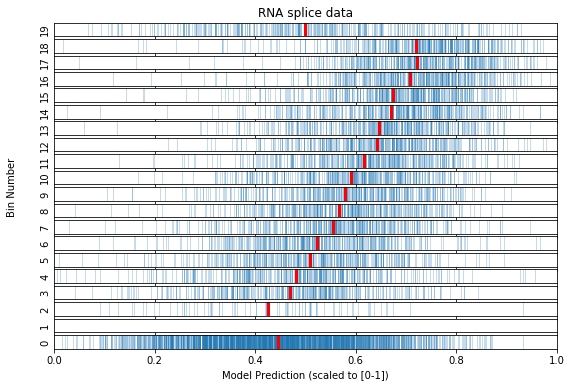

In [44]:
#plt.figure(figsize=[5,6])

# gather counts/ticks vs. predictions data
list_of_counts_lists = []
medians_vs_bin = []

# loop over ct_# columns
for ct_col_index in range(len(bins)-1):        
    
    # create temporary list and append it to list of lists
    temp_list = []
    # loop over all rows the current column
    for line_index in range(len(eval_model_df)):
        
        if(eval_model_df['ct_'+str(ct_col_index)][line_index]==1):
            
            temp_list.append(eval_model_df['val_scaled'][line_index])
    
    list_of_counts_lists.append(temp_list)
    
fig, ax = plt.subplots(nrows=len(bins)-1,sharex=True, ncols=1,figsize=(9,6))    

ax[0].set_title('RNA splice data')

# make subplots
for ct_col_index in range(len(bins)-1):

    for xc in list_of_counts_lists[len(bins)-2-ct_col_index]:
        
        ax[ct_col_index].axvline(x=xc,alpha=0.25,linewidth=1)
        
    ax[ct_col_index].axvline(x=np.mean(list_of_counts_lists[len(bins)-2-ct_col_index]),linewidth=3,color='red')    
    #ax[ct_col_index].set_ylabel('ct_'+str(len(bins)-2-ct_col_index))
    ax[ct_col_index].set_ylabel(str(len(bins)-2-ct_col_index))
    ax[ct_col_index].set_yticks([])
    medians_vs_bin.append(np.median(list_of_counts_lists[len(bins)-2-ct_col_index]))

# put x label under last panel
ax[ct_col_index].set_xlabel('Model Prediction (scaled to [0-1])')    
fig.text(0.06, 0.5, 'Bin Number', ha='center', va='center', rotation='vertical')

#plt.tight_layout() 


In [45]:
#plt.plot(medians_vs_bin,'ro')
temp_list = medians_vs_bin.copy()

In [46]:
temp_list = np.array(temp_list)
temp_list = (temp_list-min(temp_list))/(max(temp_list)-min(temp_list))

In [47]:
list_of_temp_list = []
list_of_temp_list.append(np.linspace(0,1,20))
list_of_temp_list.append(temp_list)

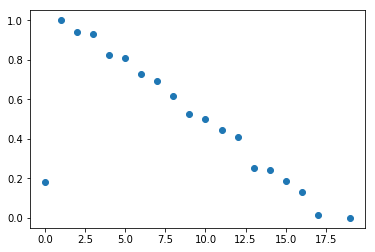

In [48]:
plt.plot(temp_list,'o')

## Learned Model

In [44]:
#learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/learn_model_via_im.csv',sep='\t',header='infer')
#learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/sort_seq_IM_model.csv',sep='\t')
learned_model_IM = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/RNA_learned_model_IM_good.csv',sep='\t')
#learned_model_im = pd.read_csv('/Users/tareen/Desktop/Desktop_Tests/MPathic3/sort_seq_LS_model.csv',sep='\t')
del learned_model_IM['Unnamed: 0']
#learned_model_IM = learned_model_IM[[ 'val_A', 'val_C', 'val_G', 'val_U']]
# learned_model_im.columns
#learned_model_im = learned_model_im[['val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G','val_H', 'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q','val_R', 'val_S', 'val_T', 'val_V', 'val_W', 'val_Y']]
learned_model_IM

,pos,val_A,val_C,val_G,val_U
0,0,-0.000183,0.000114,0.000479,-0.000410
1,1,0.000038,0.000332,0.000176,-0.000546
2,2,-0.000060,0.000382,-0.000122,-0.000199
3,3,1.055889,0.286051,-0.931117,-0.410823
4,4,-0.966718,0.622794,-0.278694,0.622618
5,5,-0.000215,0.000279,0.000362,-0.000426
6,6,-0.000071,0.000266,0.000152,-0.000346
7,7,-0.000056,-0.000053,0.000325,-0.000216
8,8,-0.000159,0.000181,0.000232,-0.000255


## Fix Gauge

In [46]:
# fix the gauge of the learned model

#row_means_list = []
#for mean_index in range(len(learned_model_IM)):
#    row_means_list.append(np.mean(learned_model_IM.loc[mean_index,:]))
#    learned_model_IM.loc[mean_index,:] = learned_model_IM.loc[mean_index,:]-row_means_list[mean_index]

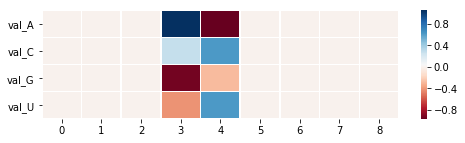

In [60]:
import seaborn as sns
plt.figure(figsize=[8,2])
sns.heatmap(learned_model_IM[[ 'val_A', 'val_C', 'val_G', 'val_U']].T,cmap='RdBu',linewidths=.5)
plt.savefig('RNA_splice_learned_model_IM.pdf')
plt.show()

In [39]:
#rna_splice_df_measurement_vs_pred = pd.read_csv('rna_splice_df_linear_trait_vs_measurements.csv')
rna_splice_df_measurement_vs_pred = pd.read_csv('global_epistasis_RNA_splicing/rna_splice_df_less_than_7_replicates.csv',sep='\t')

del rna_splice_df_measurement_vs_pred['Unnamed: 0']

In [40]:
rna_splice_df_measurement_vs_pred.head()

,seq_rna,val,replicates
0,AAAGCACAC,0.729031,6
1,AAAGCACAG,0.587774,6
2,AAAGCACCC,0.000000,6
3,AAAGCACGA,3.996918,6
4,AAAGCACUC,0.519077,6


In [49]:
#rna_linear_trait = rna_splice_df_measurement_vs_pred['prediction']
rna_linear_trait = val_scaled_eval
rna_true_labels = rna_splice_df_measurement_vs_pred['val']


#max(rna_linear_trait)
#rna_linear_trait_scaled = rna_linear_trait.values
#rna_linear_trait_scaled = (rna_linear_trait_scaled-min(rna_linear_trait_scaled))/(max(rna_linear_trait_scaled)-min(rna_linear_trait_scaled))

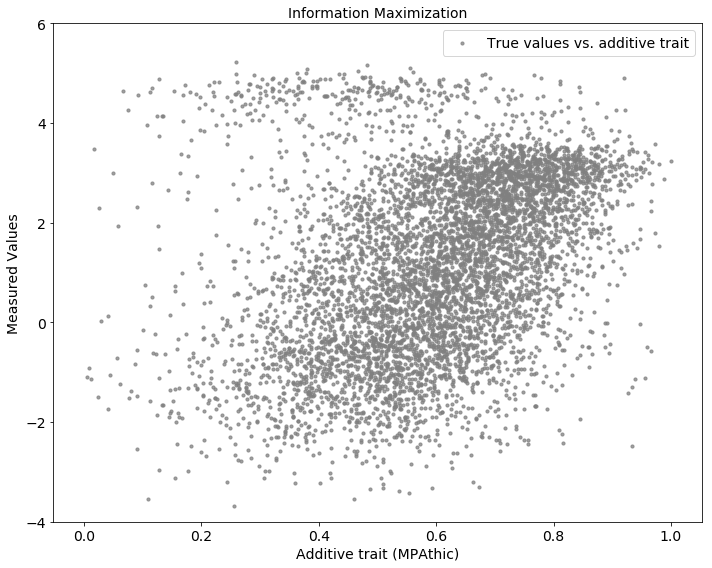

In [56]:


figure_size = [10,8]
plt.figure(figsize=figure_size)
#plt.xlim([-0.311,-0.306])
plt.ylim([-4,6])

#plt.scatter(-(np.array(list_of_temp_list[1])),np.log(np.array(list_of_temp_list[0])[::-1]/1.3+1e-10),color='black',s=30,zorder=0,label='Measurment bins vs. prediction medians')

#plt.scatter(-rna_linear_trait_scaled,rna_true_labels,s=10,alpha=0.75,color='gray', label='True values vs. additive trait',zorder=1)
plt.scatter(rna_linear_trait,np.log(rna_true_labels+1e-10),s=10,alpha=0.75,color='gray', label='True values vs. additive trait',zorder=1)
#plt.plot(medians_vs_bin)
plt.xlabel('Additive trait (MPAthic)',fontsize=14)
plt.ylabel('Measured Values',fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.title('Information Maximization',fontsize=14)
#plt.savefig('RNA_splice_measured_vs_additive_IM.pdf')
#plt.savefig('RNA_splice_measured_vs_additive_IM_with_mpathic_pred.png')
plt.tight_layout()
plt.show()

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tareen/Library/Python/3.6/lib/python/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)


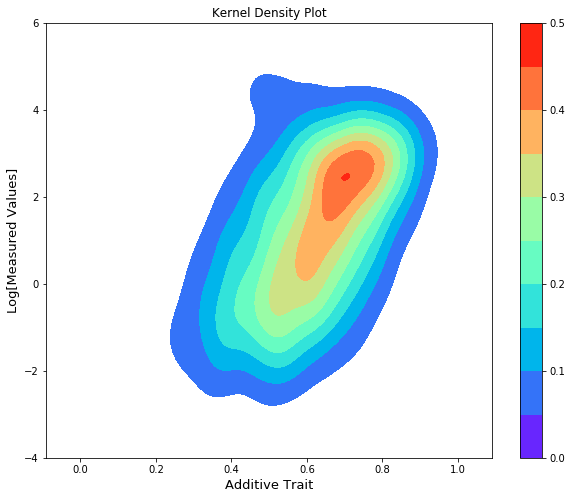

In [57]:
import matplotlib.pyplot as pl
import seaborn as sns

figure_size = [10,8]
pl.figure(figsize=figure_size)

ax = sns.kdeplot(rna_linear_trait, np.log(rna_true_labels+1e-10),figsize=[10,8],gridsize=200, shade = True, cmap = "rainbow",cbar=True)
#ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0.0)
ax.set_xlabel('Additive Trait', fontsize = 13)
ax.set_ylabel('Log[Measured Values]', fontsize = 13)
ax.set_title('Kernel Density Plot')
#pl.xlim(-0.7, -0.2)
#figure_size = [10,8]
#pl.figure(figsize=figure_size)
pl.ylim([-4, 6])
#pl.scatter(-rna_linear_trait_scaled,np.log(rna_true_labels),s=1,alpha=0.25,color='gray', zorder=1)
#pl.plot([-3, 3], [-3, 3], color = "black", linewidth = 1)
pl.show()



## Sequences Logos

In [427]:
import sys
sys.path.insert(0,'/Users/tareen/Desktop/Desktop_Tests/logomaker3')
import logomaker

In [428]:
rna_splice_df_measurement_vs_pred.columns

Index(['seq_rna', 'val_predicted', 'evaluated_mpathic_linear_trait',
       'measurments', 'measurements_scaled_0_1'],
      dtype='object')

In [435]:
seq_measurments = rna_splice_df_measurement_vs_pred[['measurements_scaled_0_1','seq_rna']].copy()

In [635]:
# sequences with value greater than some number
high_value_seqs = seq_measurments.loc[seq_measurments['measurements_scaled_0_1']>=0.5]['seq_rna']
low_value_seqs = seq_measurments.loc[seq_measurments['measurements_scaled_0_1']<0.5]['seq_rna']

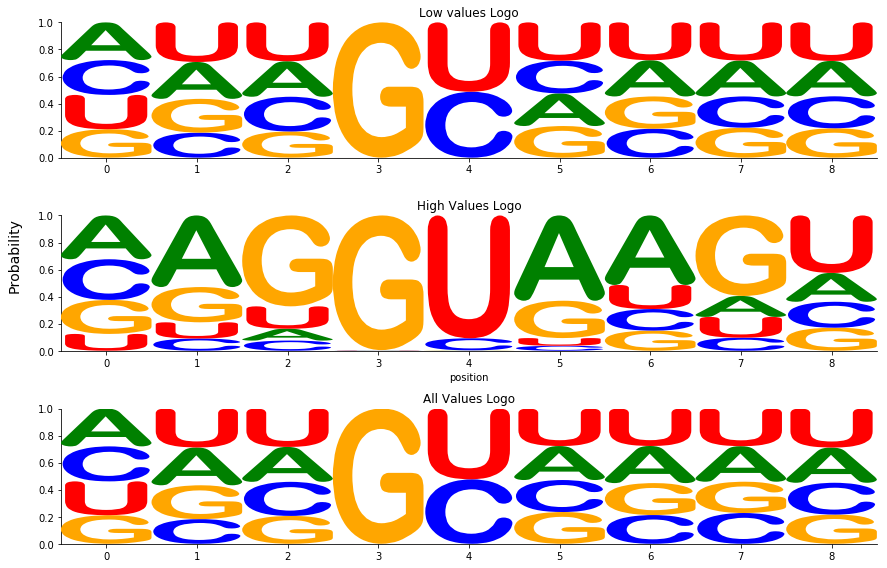

In [636]:
all_seqs = pd.DataFrame({'seqs':seq_measurments['seq_rna']})
loaded_alignment_all_seqs = logomaker.load_alignment(sequences = all_seqs['seqs'])

high_value_seqs_df = pd.DataFrame({'seqs':high_value_seqs.values})
loaded_alignment_high_val_seqs = logomaker.load_alignment(sequences = high_value_seqs_df['seqs'])



low_value_seqs_df = pd.DataFrame({'seqs':low_value_seqs.values})
loaded_alignment_low_val_seqs = logomaker.load_alignment(sequences = low_value_seqs_df['seqs'])

logo_low_val = logomaker.make_logo(
                            dataframe=loaded_alignment_low_val_seqs,
                            matrix_type='probability',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )


logo_high_val = logomaker.make_logo(
                            dataframe=loaded_alignment_high_val_seqs,
                            matrix_type='probability',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )

logo_all_seqs = logomaker.make_logo(
                            dataframe=loaded_alignment_all_seqs,
                            matrix_type='probability',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )


# Draw logos
fig, ax_list = plt.subplots(3, figsize=[12,8])
ax_list[0].set_title('Low values Logo')
logo_low_val.draw(ax_list[0])
ax_list[1].set_title('High Values Logo')
ax_list[1].set_xlabel('position')
logo_high_val.draw(ax_list[1])
#fig.text(-0.015, 0.55, 'Infomration [Bits]', ha='center', va='center', rotation='vertical',fontsize=14)
fig.text(-0.015, 0.55, 'Probability', ha='center', va='center', rotation='vertical',fontsize=14)
ax_list[2].set_title('All Values Logo')
logo_all_seqs.draw(ax_list[2])

Text(-0.015,0.55,'Information [bits]')

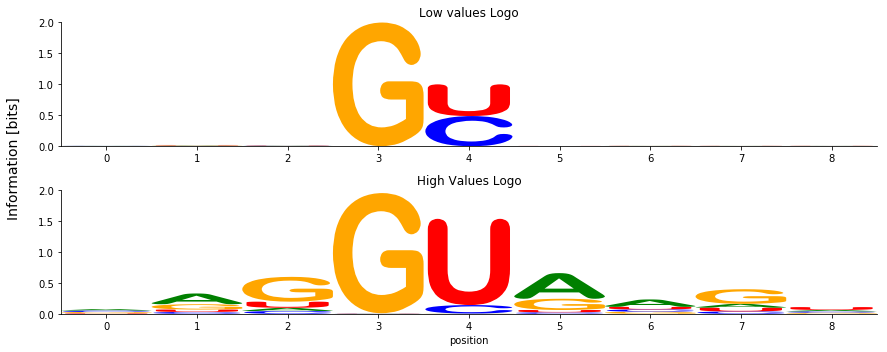

In [652]:
all_seqs = pd.DataFrame({'seqs':seq_measurments['seq_rna']})
loaded_alignment_all_seqs = logomaker.load_alignment(sequences = all_seqs['seqs'])

high_value_seqs_df = pd.DataFrame({'seqs':high_value_seqs.values})
loaded_alignment_high_val_seqs = logomaker.load_alignment(sequences = high_value_seqs_df['seqs'])



low_value_seqs_df = pd.DataFrame({'seqs':low_value_seqs.values})
loaded_alignment_low_val_seqs = logomaker.load_alignment(sequences = low_value_seqs_df['seqs'])

logo_low_val = logomaker.make_logo(
                            dataframe=loaded_alignment_low_val_seqs,
                            matrix_type='information',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )


logo_high_val = logomaker.make_logo(
                            dataframe=loaded_alignment_high_val_seqs,
                            matrix_type='information',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )

logo_all_seqs = logomaker.make_logo(
                            dataframe=loaded_alignment_all_seqs,
                            matrix_type='information',
                            sequence_type='RNA',
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            #ylim=[0,0.5]
                    )


# Draw logos
fig, ax_list = plt.subplots(2, figsize=[12,5])
ax_list[0].set_title('Low values Logo')
logo_low_val.draw(ax_list[0])
ax_list[1].set_title('High Values Logo')
ax_list[1].set_xlabel('position')
logo_high_val.draw(ax_list[1])
#fig.text(-0.015, 0.55, 'Infomration [Bits]', ha='center', va='center', rotation='vertical',fontsize=14)
fig.text(-0.015, 0.55, 'Information [bits]', ha='center', va='center', rotation='vertical',fontsize=14)
#ax_list[2].set_title('All Values Logo')
#logo_all_seqs.draw(ax_list[2])

In [574]:
#loaded_alignment_low_val_seqs.loc[3:4,:]
temp_low_val = loaded_alignment_low_val_seqs[loaded_alignment_low_val_seqs.index != 3].copy()
temp_low_val = temp_low_val[temp_low_val.index !=4]                      

temp_high_val = loaded_alignment_high_val_seqs[loaded_alignment_high_val_seqs.index != 3].copy()
temp_high_val = temp_high_val[temp_high_val.index !=4]                      

Text(-0.015,0.55,'Infomration [Bits]')

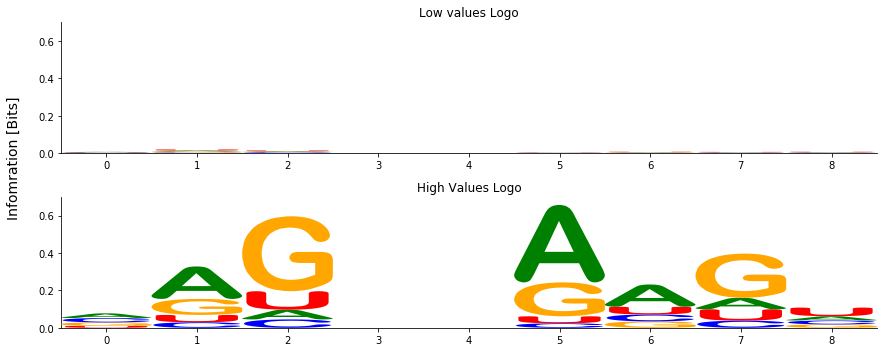

In [588]:
high_value_seqs_df = pd.DataFrame({'seqs':high_value_seqs.values})
loaded_alignment_high_val_seqs = logomaker.load_alignment(sequences = high_value_seqs_df['seqs'])

low_value_seqs_df = pd.DataFrame({'seqs':low_value_seqs.values})
loaded_alignment_low_val_seqs = logomaker.load_alignment(sequences = low_value_seqs_df['seqs'])

logo_low_val = logomaker.make_logo(
                            dataframe=temp_low_val,
                            matrix_type='information',
                            remove_flattened_characters=False,
                            ytick_format='%0.1f',
                            sequence_type='RNA',
                            draw_now=False,
                            figsize=[12,3],
                            ylim=[0,0.7]
                    )


logo_high_val = logomaker.make_logo(
                            dataframe=temp_high_val,
                            matrix_type='information',
                            remove_flattened_characters=False,
                            ytick_format='%0.1f',
                            draw_now=False,
                            figsize=[12,3],
                            sequence_type='RNA',
                            ylim=[0,0.7]
                    )

#highlight_style_param_dict = {
#                              'highlight_sequence':'ATTAATGTGAGTTAGCTCACTCATTA',   
#                              'highlight_colors':'gist_rainbow'
#                               }



# Draw logos
fig, ax_list = plt.subplots(2, figsize=[12,5])
ax_list[0].set_title('Low values Logo')
logo_low_val.draw(ax_list[0])
ax_list[1].set_title('High Values Logo')
logo_high_val.draw(ax_list[1])
fig.text(-0.015, 0.55, 'Infomration [Bits]', ha='center', va='center', rotation='vertical',fontsize=14)

## Save high value sequences to be fed into mpathic

In [675]:
high_value_seqs = seq_measurments.loc[seq_measurments['measurements_scaled_0_1']>=0.2]

In [662]:
type(high_value_seqs)

pandas.core.frame.DataFrame

In [663]:
high_value_seqs.to_csv('high_val_rna_seq_measurments.csv')

## Sample for low value sequences, such that len low val samples == high vals samples

In [664]:
len(high_value_seqs)

1120

In [666]:
low_value_seqs = seq_measurments.loc[seq_measurments['measurements_scaled_0_1']<0.2]

In [669]:
max_index_to_sample = len(low_value_seqs)
size_of_random_samples_from_low_val_seqs = len(high_value_seqs)
random_low_val_samples = np.random.randint(max_index_to_sample, size=size_of_random_samples_from_low_val_seqs)

In [670]:
random_low_val_samples

array([10456, 15469, 17651, ...,   526,  3142,  5342])

In [674]:
down_sampled_low_val_seqs = low_value_seqs.loc[random_low_val_samples].copy()

In [677]:
high_value_seqs.head()

,measurements_scaled_0_1,seq_rna
233,0.737186,AAAGUAAGA
234,0.738149,AAAGUAAGC
235,0.699324,AAAGUAAGG
236,0.523931,AAAGUAAGU
247,0.250872,AAAGUACGA


In [679]:
balanced_rna_splice_df = pd.concat([high_value_seqs,down_sampled_low_val_seqs])

In [688]:
balanced_rna_splice_df = balanced_rna_splice_df.dropna()

In [689]:
balanced_rna_splice_df.to_csv('balanced_rna_splice_df.csv')